We take the expression for $ln(2)$ to be $ln(2) = \lim_{N \to \infty} \sum_{k=1}^{N} \frac{1}{k 2^k} $

Let us compute this sum for a given input $N$.

We don't compute $2^k$ with every iteration for the sake of numerical stability and saved time complexity.
An accumulator that constantly multiplies by 2 saves us compute time.

In [2]:
! pip3 install tqdm
! pip3 install matplotlib
! pip3 install numpy

100%|██████████| 10004/10004 [00:00<00:00, 349630.18it/s]


Custom function 0.6931471805599451
NumPy Approximation 0.6931471805599453
Final Error: 2.220446049250313e-16
Bits allocated for a float: 64


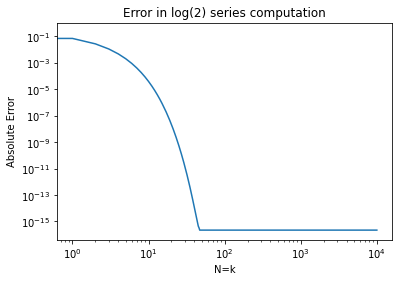

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

def compute_sum(N):
    # Accumulator to constantly multiply by 2
    power_of_2 = 1
    acc_sum = 0
    err = []
    interval = int(np.log10(N)) - 1

    for k in tqdm(range(1, N + 1)):
        power_of_2 *= 2
        # last sum as last element of the array
        acc_sum += 1 / (k * power_of_2)
        err.append(abs(acc_sum - np.log(2)))
    # plt.plot(err)
    # plt.scatter(range(len(err)), err)
    plt.ylabel("Absolute Error")
    plt.xlabel(f"N=k")
    plt.title("Error in log(2) series computation")
    plt.loglog(err)
    return acc_sum

ans = compute_sum(10004)
act = np.log(2)
print("Custom function", ans)
print("NumPy Approximation", act)
print("Final Error:", abs(act - ans))

As can be seen, there's a decreasing error as $N \rightarrow 64$ and then flatlines after 64.
This is because floats occupy 64 bits. When k > 64, the computer can't compute more specific differences.

In [38]:
print("Bits allocated for a float:", np.finfo(float).bits)

Bits allocated for a float: 64
